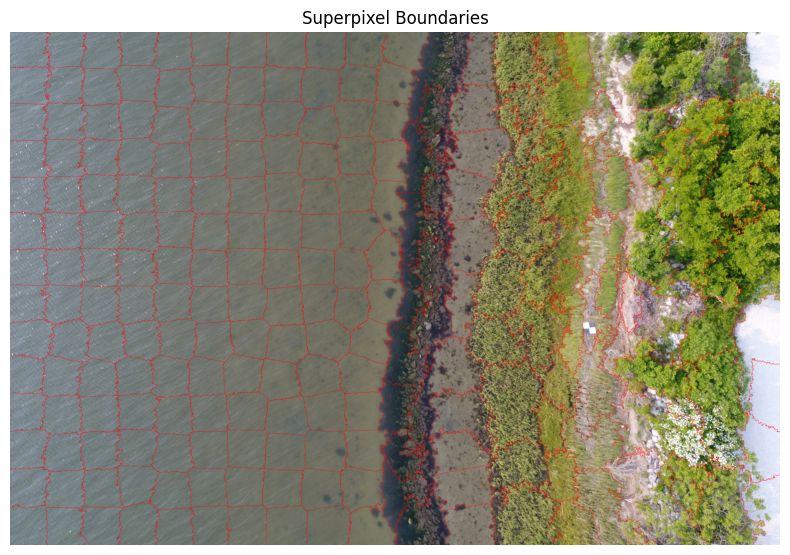

In [73]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from skimage.measure import regionprops, find_contours
from shapely.geometry import Polygon
import pandas as pd

# ==== 1. Load R, G, B Bands ====
img_r = cv2.imread("/Users/xiaoxug/Desktop/Poplar/Image/R_band/DJI_0118_R.jpg", cv2.IMREAD_GRAYSCALE)
img_g = cv2.imread("/Users/xiaoxug/Desktop/Poplar/Image/G_band/DJI_0118_G.jpg", cv2.IMREAD_GRAYSCALE)
img_b = cv2.imread("/Users/xiaoxug/Desktop/Poplar/Image/B_band/DJI_0118_B.jpg", cv2.IMREAD_GRAYSCALE)

# Stack into RGB image
img_rgb = cv2.merge([img_r, img_g, img_b])  # OpenCV default: BGR

# ==== 2. Run SLIC Superpixel Segmentation ====
segments = slic(img_rgb, n_segments=300, compactness=10, start_label=1)

# ==== 3. Overlay Superpixel Boundaries ====
overlay_img = mark_boundaries(img_rgb, segments, color=(1, 0, 0), mode='thick')

plt.figure(figsize=(8, 8))
plt.imshow(overlay_img)
plt.axis("off")
plt.title("Superpixel Boundaries")
plt.tight_layout()
plt.savefig("superpixel_overlay.png", dpi=300)
plt.show()


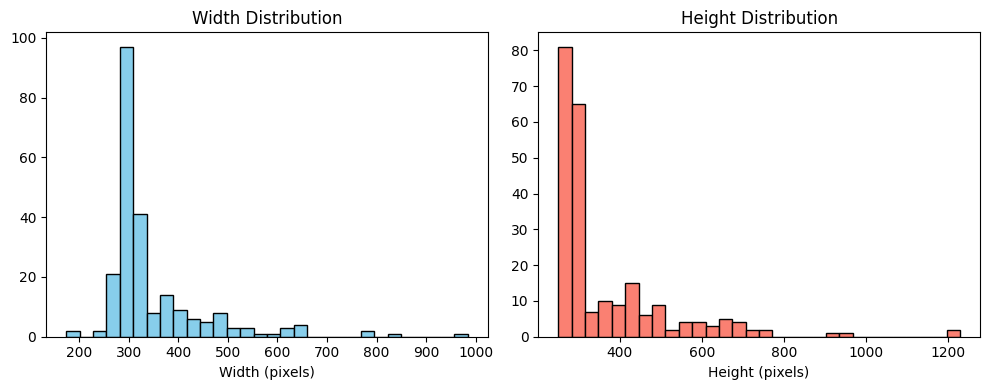

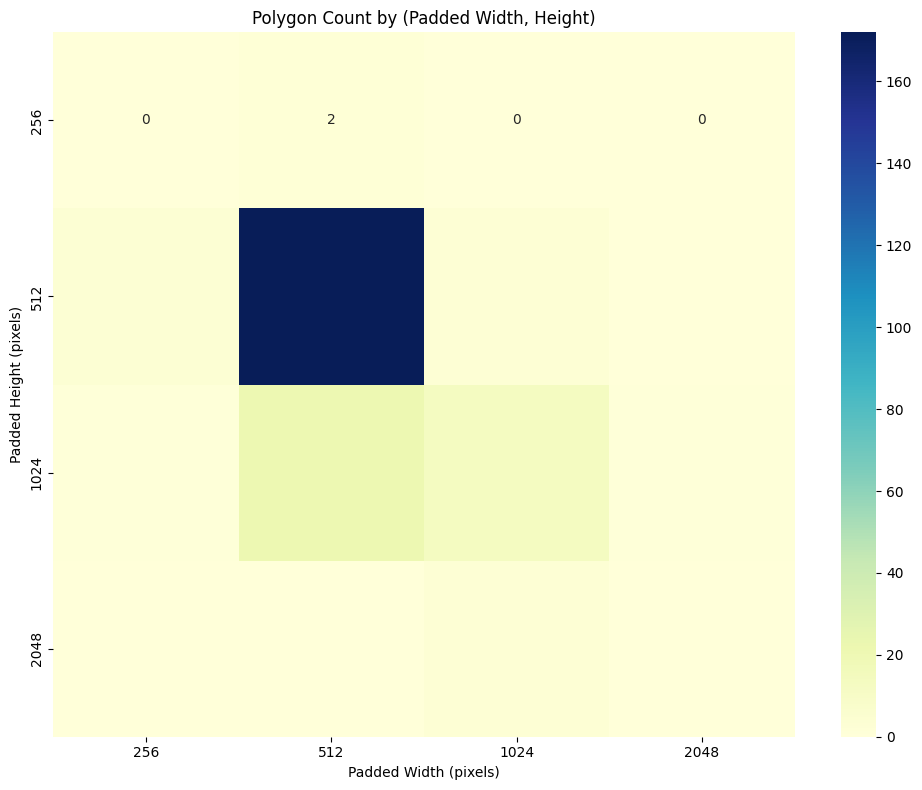

In [81]:
import math
import seaborn as sns

# ==== Utility: Round up to next power of 2 ====
def next_pow2(x):
    return 1 if x <= 1 else 2 ** math.ceil(math.log2(x))

# ==== 1. Plot raw width & height histogram ====
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(df['width'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title("Width Distribution")
axes[0].set_xlabel("Width (pixels)")

axes[1].hist(df['height'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title("Height Distribution")
axes[1].set_xlabel("Height (pixels)")
plt.tight_layout()
plt.savefig("width_height_histogram.png")
plt.show()

# ==== 2. Pad and Save RGB Polygons to Nearest 2^n ====
os.makedirs('polygon_images_padded', exist_ok=True)

width_height_counts = {}

for i, region in enumerate(regionprops(segments)):
    mask = (segments == region.label).astype(np.uint8)
    contours = find_contours(mask, 0.5)
    if not contours:
        continue

    contour = max(contours, key=len)
    contour = np.fliplr(contour)
    poly = Polygon(contour)

    if poly.is_valid and poly.area > 10:
        minr, minc, maxr, maxc = region.bbox
        width = maxc - minc
        height = maxr - minr
        cropped = img_rgb[minr:maxr, minc:maxc] * mask[minr:maxr, minc:maxc, np.newaxis]

        padded_w = next_pow2(width)
        padded_h = next_pow2(height)

        # Pad to centered square
        pad_rgb = np.zeros((padded_h, padded_w, 3), dtype=np.uint8)
        offset_y = (padded_h - height) // 2
        offset_x = (padded_w - width) // 2
        pad_rgb[offset_y:offset_y+height, offset_x:offset_x+width] = cropped

        cv2.imwrite(f'polygon_images_padded/polygon_{i:03d}_pad{padded_w}x{padded_h}.png',
                    cv2.cvtColor(pad_rgb, cv2.COLOR_RGB2BGR))

        key = (padded_w, padded_h)
        width_height_counts[key] = width_height_counts.get(key, 0) + 1

# ==== 3. Plot Matrix: (padded width, padded height) count ====
# Convert count dict to DataFrame
count_matrix = pd.DataFrame([
    {'width': w, 'height': h, 'count': c}
    for (w, h), c in width_height_counts.items()
])

pivot_table = count_matrix.pivot_table(index='height', columns='width', values='count', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title("Polygon Count by (Padded Width, Height)")
plt.xlabel("Padded Width (pixels)")
plt.ylabel("Padded Height (pixels)")
plt.tight_layout()
plt.savefig("padded_size_matrix.png")
plt.show()


Computing WST features...




WST extract:   0%|                                       | 0/28 [00:00<?, ?it/s]

WST extract:   4%|█                              | 1/28 [00:00<00:19,  1.36it/s]

📣 Correct scattering channels: 3




WST extract:   7%|██▏                            | 2/28 [00:02<00:33,  1.27s/it]

📣 Correct scattering channels: 3




WST extract:  11%|███▎                           | 3/28 [00:10<01:45,  4.22s/it]

📣 Correct scattering channels: 3




WST extract:  14%|████▍                          | 4/28 [00:13<01:36,  4.02s/it]

📣 Correct scattering channels: 3




WST extract:  18%|█████▌                         | 5/28 [00:14<01:05,  2.83s/it]

📣 Correct scattering channels: 3




WST extract:  21%|██████▋                        | 6/28 [00:18<01:08,  3.12s/it]

📣 Correct scattering channels: 3




WST extract:  25%|███████▊                       | 7/28 [00:21<01:08,  3.28s/it]

📣 Correct scattering channels: 3




WST extract:  29%|████████▊                      | 8/28 [00:25<01:07,  3.38s/it]

📣 Correct scattering channels: 3




WST extract:  32%|█████████▉                     | 9/28 [00:27<00:54,  2.85s/it]

📣 Correct scattering channels: 3




WST extract:  36%|██████████▋                   | 10/28 [00:28<00:44,  2.48s/it]

📣 Correct scattering channels: 3




WST extract:  39%|███████████▊                  | 11/28 [00:29<00:31,  1.83s/it]

📣 Correct scattering channels: 3




WST extract:  43%|████████████▊                 | 12/28 [00:29<00:23,  1.50s/it]

📣 Correct scattering channels: 3




WST extract:  46%|█████████████▉                | 13/28 [00:30<00:19,  1.28s/it]

📣 Correct scattering channels: 3




WST extract:  50%|███████████████               | 14/28 [00:32<00:20,  1.46s/it]

📣 Correct scattering channels: 3




WST extract:  54%|████████████████              | 15/28 [00:32<00:14,  1.13s/it]

📣 Correct scattering channels: 3




WST extract:  57%|█████████████████▏            | 16/28 [00:36<00:22,  1.87s/it]

📣 Correct scattering channels: 3




WST extract:  61%|██████████████████▏           | 17/28 [00:37<00:16,  1.53s/it]

📣 Correct scattering channels: 3




WST extract:  64%|███████████████████▎          | 18/28 [00:38<00:13,  1.31s/it]

📣 Correct scattering channels: 3




WST extract:  68%|████████████████████▎         | 19/28 [00:39<00:12,  1.42s/it]

📣 Correct scattering channels: 3




WST extract:  71%|█████████████████████▍        | 20/28 [00:40<00:09,  1.23s/it]

📣 Correct scattering channels: 3




WST extract:  75%|██████████████████████▌       | 21/28 [00:44<00:13,  1.94s/it]

📣 Correct scattering channels: 3




WST extract:  79%|███████████████████████▌      | 22/28 [00:45<00:11,  1.91s/it]

📣 Correct scattering channels: 3




WST extract:  82%|████████████████████████▋     | 23/28 [00:47<00:09,  1.86s/it]

📣 Correct scattering channels: 3




WST extract:  86%|█████████████████████████▋    | 24/28 [00:48<00:06,  1.55s/it]

📣 Correct scattering channels: 3




WST extract:  89%|██████████████████████████▊   | 25/28 [00:50<00:04,  1.60s/it]

📣 Correct scattering channels: 3




WST extract:  93%|███████████████████████████▊  | 26/28 [00:50<00:02,  1.35s/it]

📣 Correct scattering channels: 3




WST extract:  96%|████████████████████████████▉ | 27/28 [00:51<00:01,  1.16s/it]

📣 Correct scattering channels: 3




WST extract: 100%|██████████████████████████████| 28/28 [00:52<00:00,  1.87s/it]

📣 Correct scattering channels: 3
Saved WST features to wst_features_j2_l8.npy

=== RGB only ===
              precision    recall  f1-score   support

      Class1       0.50      1.00      0.67         2
      Class2       0.00      0.00      0.00         2
      Class3       0.50      0.50      0.50         2

    accuracy                           0.50         6
   macro avg       0.33      0.50      0.39         6
weighted avg       0.33      0.50      0.39         6

Confusion matrix:
 [[2 0 0]
 [1 0 1]
 [1 0 1]]

=== WST only ===
              precision    recall  f1-score   support

      Class1       0.50      0.50      0.50         2
      Class2       1.00      0.50      0.67         2
      Class3       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.61      0.50      0.52         6
weighted avg       0.61      0.50      0.52         6

Confusion matrix:
 [[1 0 1]
 [0 1 1]
 [1 0 1]]

=== RGB + WST ===
           


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


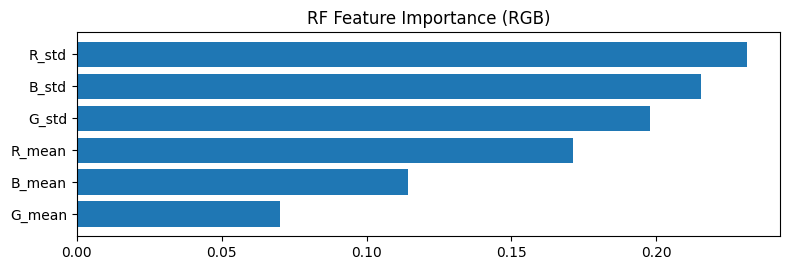

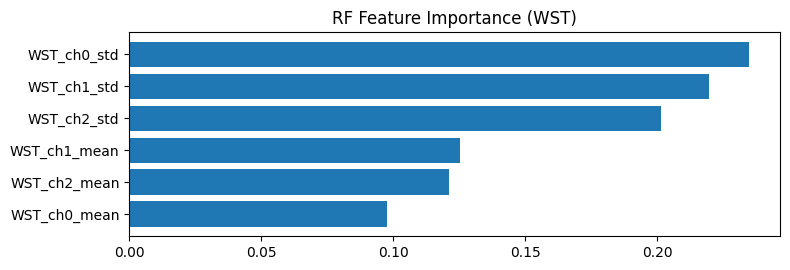

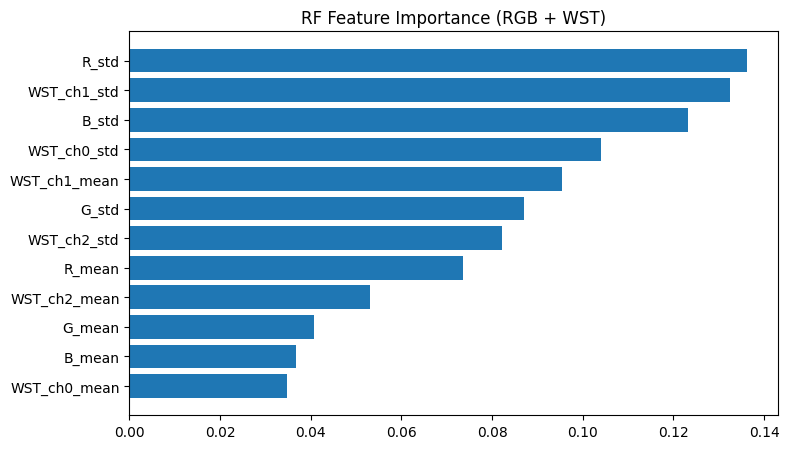

In [103]:
import os
import cv2
import numpy as np
import torch
from tqdm import tqdm
from kymatio.torch import Scattering2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1) Load images & labels (grayscale)
def load_images_and_labels(root_dir):
    images, labels = [], []
    for cls in os.listdir(root_dir):
        cls_path = os.path.join(root_dir, cls)
        if not os.path.isdir(cls_path): continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith((".png", ".jpg")):
                img = cv2.imread(os.path.join(cls_path, fname), cv2.IMREAD_GRAYSCALE)
                images.append(img)
                labels.append(cls)
    return images, np.array(labels)

# 2) RGB feature extractor (mean & std per channel)
def extract_rgb_features_color(img_rgb):
    feats = []
    for c in range(3):
        channel = img_rgb[:, :, c]
        feats.append(channel.mean())
        feats.append(channel.std())
    return np.array(feats)

# 3) WST stats per scattering channel (mean & std)
def extract_wst_stats_per_channel(img_gray, J=2, L=8):
    x = img_gray.astype(np.float32) / 255.0
    H, W = x.shape
    S = Scattering2D(J=J, shape=(H, W), L=L)
    x_tensor = torch.from_numpy(x).unsqueeze(0).unsqueeze(0)

    with torch.no_grad():
        out = S(x_tensor)  
    # ↓ remove batch & order dims ↓
    coeffs = out.squeeze(0).squeeze(0).numpy()  # now (C, H', W')
    print(f"📣 Correct scattering channels: {coeffs.shape[0]}")

    C = coeffs.shape[0]
    stats = np.empty((2*C,), dtype=np.float32)
    for i in range(C):
        ch = coeffs[i].ravel()
        stats[2*i    ] = ch.mean()
        stats[2*i + 1] = ch.std()
    return stats


# Initialize the flag
extract_wst_stats_per_channel.first = True

# 4) Plot top‐n feature importances
def plot_top_importances(importances, feature_names, title, fname, topn=20):
    imp = np.array(importances)
    topn = min(topn, len(imp))  # prevent mismatch
    idx = np.argsort(imp)[::-1][:topn]
    
    plt.figure(figsize=(8, topn*0.3 + 1))
    plt.barh(range(topn), imp[idx][::-1])
    plt.yticks(range(topn), [feature_names[i] for i in idx][::-1])
    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()


# 5) Main pipeline
if __name__ == "__main__":
    # load
    color_images = []
    gray_images, y = load_images_and_labels("polygon_images_padded")
    # also load color for RGB features
    for cls in os.listdir("polygon_images_padded"):
        cls_path = os.path.join("polygon_images_padded", cls)
        if not os.path.isdir(cls_path): continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith((".png", ".jpg")):
                img = cv2.imread(os.path.join(cls_path, fname))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                color_images.append(img)

    # extract features
    X_rgb = np.array([extract_rgb_features_color(img) for img in color_images])

    # ==== Load or compute and save WST features ====
    wst_feature_file = "wst_features_j1_l2.npy"
    if os.path.exists(wst_feature_file):
        print(f"✅ Loaded cached WST features from {wst_feature_file}")
        X_wst = np.load(wst_feature_file)
        num_channels = X_wst.shape[1] // 2
        print(f"📣 Loaded WST features contain {num_channels} scattering channels.")
    else:
        print("Computing WST features...")
        X_wst = np.array([
            extract_wst_stats_per_channel(img, J=1, L=2)
            for img in tqdm(gray_images, desc="WST extract")
        ])
        np.save(wst_feature_file, X_wst)
        print(f"Saved WST features to {wst_feature_file}")

    X_comb = np.hstack([X_rgb, X_wst])

    # consistent train/test split across all feature sets
    idx_train, idx_test, y_train, y_test = train_test_split(
        np.arange(len(y)), y, stratify=y, test_size=0.2, random_state=42
    )

    # helper to train & evaluate
    def train_eval(X, name):
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
        clf.fit(X[idx_train], y_train)
        y_pred = clf.predict(X[idx_test])
        print(f"\n=== {name} ===")
        print(classification_report(y_test, y_pred))
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
        return clf

    clf_rgb  = train_eval(X_rgb,  "RGB only")
    clf_wst  = train_eval(X_wst,  "WST only")
    clf_comb = train_eval(X_comb, "RGB + WST")

    # feature names
    rgb_names = ["R_mean","R_std","G_mean","G_std","B_mean","B_std"]
    C = X_wst.shape[1] // 2
    wst_names = [f"WST_ch{i}_{stat}" for i in range(C) for stat in ("mean","std")]
    comb_names = rgb_names + wst_names

    # plot importances
    plot_top_importances(clf_rgb.feature_importances_, rgb_names,
                         "RF Feature Importance (RGB)", "imp_rgb.png")
    plot_top_importances(clf_wst.feature_importances_, wst_names,
                         "RF Feature Importance (WST)", "imp_wst.png")
    plot_top_importances(clf_comb.feature_importances_, comb_names,
                         "RF Feature Importance (RGB + WST)", "imp_combined.png")
